#-RETO 1 NAIVE BAYES

In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
solicitantes = pd.read_excel('/content/drive/MyDrive/0. SolicitantesCrédito.xlsx')

In [3]:
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

In [4]:
solicitantes.shape

(8378, 35)

In [5]:
XD = solicitantes.dropna(subset='PreApr')

In [6]:
XD = XD[['Edad', 'Ingresos', 'Egresos', 'Monto (EAD)', 'Plazo', 'Cuota (COP)', 'Hijos', 'Perscargo', 'Estrato']]
XD

,Edad,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP),Hijos,Perscargo,Estrato
0,38,5424576,7585302,2.815030e+06,48,82691.506204,1,0,3
1,51,1144064,1640079,6.301439e+05,36,22781.212598,6,1,4
2,37,2069853,2831440,1.280540e+06,36,46294.596244,2,0,3
3,29,1893080,2482276,1.393414e+06,24,69564.950015,1,0,2
4,42,3000367,3630221,2.252986e+06,24,112478.307883,3,4,2
...,...,...,...,...,...,...,...,...,...
8371,48,4831392,3392105,3.366188e+06,36,121695.762156,0,0,3
8373,31,5891088,4292158,3.918572e+06,48,115108.056436,2,0,5
8374,38,3092079,3028098,2.677266e+06,36,96789.562091,0,0,3
8375,43,2542007,3513112,1.375112e+06,36,49713.608249,1,2,2


In [7]:
yd = solicitantes['PreApr'].dropna()
yd

,PreApr
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
8371,1.0
8373,1.0
8374,1.0
8375,1.0


In [8]:
import numpy as np
XDArray = np.array(XD, dtype=float)
ydArray = np.array(yd, dtype=float)

In [9]:
XDArray

array([[3.800000e+01, 5.424576e+06, 7.585302e+06, ..., 1.000000e+00,
        0.000000e+00, 3.000000e+00],
       [5.100000e+01, 1.144064e+06, 1.640079e+06, ..., 6.000000e+00,
        1.000000e+00, 4.000000e+00],
       [3.700000e+01, 2.069853e+06, 2.831440e+06, ..., 2.000000e+00,
        0.000000e+00, 3.000000e+00],
       ...,
       [3.800000e+01, 3.092079e+06, 3.028098e+06, ..., 0.000000e+00,
        0.000000e+00, 3.000000e+00],
       [4.300000e+01, 2.542007e+06, 3.513112e+06, ..., 1.000000e+00,
        2.000000e+00, 2.000000e+00],
       [3.700000e+01, 5.677067e+06, 5.264273e+06, ..., 1.000000e+00,
        2.000000e+00, 3.000000e+00]])

In [10]:
ydArray

array([1., 1., 0., ..., 1., 1., 1.])

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
modelNB = GaussianNB()

In [13]:
modelNB.fit(XDArray, ydArray)

GaussianNB()

In [14]:
ydPred = modelNB.predict(XDArray)
ydPred

array([1., 0., 0., ..., 0., 0., 1.])

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [16]:
cm = confusion_matrix(ydArray,  ydPred)
cm

array([[2539,  420],
       [1041, 1842]])

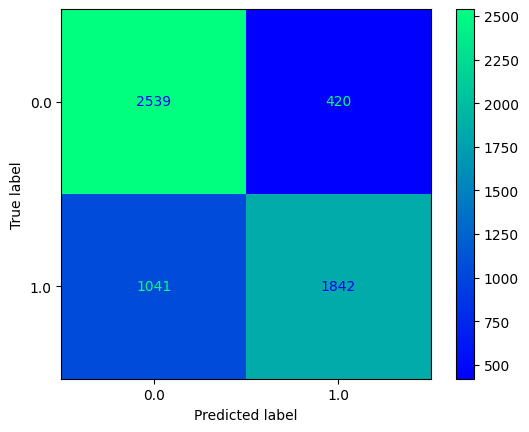

In [17]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelNB.classes_)
disp.plot(cmap='winter')
plt.show()

In [20]:
#Extraigo los valores de la matriz de confusión
VN = cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]

#MÉTRICAS

#Exactitud (Accuracy)
exactitud = (VN+VP)/cm.sum()
print(f'La exactitud (accuracy) del modelo es de {exactitud:.2%}')

#Tasa de error
error = 1-exactitud
print(f'El error del modelo es de {error:.2%}')

#Precisión
precision = VP/(FP+VP)
print(f'La precisión del modelo es de {precision:.2%}')

#Sensibilidad (Recall)
sensibilidad = VP/(VP+FN)
print(f'la sensibilidad del modelo es de {sensibilidad:.2%}')

#Especificidad
especificidad = VN/(VN+FP)
print(f'la especificidad del modelo es de {especificidad:.2%}')

La exactitud (accuracy) del modelo es de 74.99%
El error del modelo es de 25.01%
La precisión del modelo es de 81.43%
la sensibilidad del modelo es de 63.89%
la especificidad del modelo es de 85.81%


-En cuanto a la exactitud podemos evidenciar que tuvo una disminución, esto quiere decir que desmejoro ya que hace más clasificaciones erróneas.

-El error aumentó, esto influye por el resultado que dió la exactitud y esto puede ser por tener más equivocaiones en la manera en la que se dividen los datos.

-La precisión tuvo una mejora lo que indica que el modelo cometió menos errores.

-La sensibilidad desmejoró lo que quiere decir que el modelo 2 podría estar cometiendo errores a la hora de detectar casos reales.

-La especificidad  mejoró ya que se podría decir que clasifica de una manera mucho mejor los casos negativos.

In [21]:
XDGener = solicitantes[solicitantes['PreApr'].isna()]
XDGener

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Estrato,Nivel de estudios,Tipo de contrato,Ingresos,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
6,7,38,NR,Soltero,3,0,3,Profesional,Indefinido,1534711,...,60,2.009414e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
7,8,47,Mujer,Casado,0,0,2,Profesional,Ninguno,136750,...,48,3.563229e+03,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
11,12,46,Mujer,Casado,0,1,4,Primaria,Indefinido,7097220,...,3,1.090054e+06,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
13,14,37,Mujer,Soltero,4,2,2,Técnico,Ninguno,1791987,...,48,6.856249e+04,Buena Experiencia CFB,Sin Codeudor,Prop.sin Hipoteca,Mora mayor a 60 Dìas,NaN,NaN,NaN,NaN
16,17,22,NR,Unión Libre,1,0,2,Bachiller,Fijo,2892545,...,36,6.824255e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,8358,24,NR,Casado,1,0,4,Técnico,Fijo,2433168,...,48,1.026380e+05,Buenas Referencias,Con Codeudor(es),Vehìculo sin Prenda,Sin experiencia,NaN,NaN,NaN,NaN
8358,8359,66,Hombre,Unión Libre,1,0,1,Técnico,Indefinido,83684,...,24,1.908509e+03,Buenas Referencias,Libranza Establecida,Sin Patrimonio,Mora mayor a 60 Dìas,NaN,NaN,NaN,NaN
8367,8368,32,NR,Unión Libre,0,1,4,Bachiller,Fijo,1133063,...,36,3.665316e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
8372,8373,35,Hombre,Separado,2,1,3,Primaria,Indefinido,3073152,...,18,1.375805e+05,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN


In [22]:
XDGener.shape

(2536, 35)

In [23]:
XDGener = XDGener[['Edad', 'Ingresos', 'Egresos', 'Monto (EAD)', 'Plazo', 'Cuota (COP)', 'Hijos', 'Perscargo', 'Estrato']]
XDGener

,Edad,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP),Hijos,Perscargo,Estrato
6,38,1534711,1658694,7.913126e+05,60,2.009414e+04,3,0,3
7,47,136750,171155,1.213014e+05,48,3.563229e+03,0,0,2
11,46,7097220,9525257,3.174456e+06,3,1.090054e+06,0,1,4
13,37,1791987,1391431,2.334042e+06,48,6.856249e+04,4,2,2
16,22,2892545,3576891,1.887636e+06,36,6.824255e+04,1,0,2
...,...,...,...,...,...,...,...,...,...
8357,24,2433168,1518301,3.494059e+06,48,1.026380e+05,1,0,4
8358,66,83684,120852,3.822821e+04,24,1.908509e+03,1,0,1
8367,32,1133063,766199,1.013852e+06,36,3.665316e+04,0,1,4
8372,35,3073152,3812690,2.156239e+06,18,1.375805e+05,2,1,3


In [24]:
XDGenerArray = np.array(XDGener, dtype=float)
XDGenerArray

array([[3.800000e+01, 1.534711e+06, 1.658694e+06, ..., 3.000000e+00,
        0.000000e+00, 3.000000e+00],
       [4.700000e+01, 1.367500e+05, 1.711550e+05, ..., 0.000000e+00,
        0.000000e+00, 2.000000e+00],
       [4.600000e+01, 7.097220e+06, 9.525257e+06, ..., 0.000000e+00,
        1.000000e+00, 4.000000e+00],
       ...,
       [3.200000e+01, 1.133063e+06, 7.661990e+05, ..., 0.000000e+00,
        1.000000e+00, 4.000000e+00],
       [3.500000e+01, 3.073152e+06, 3.812690e+06, ..., 2.000000e+00,
        1.000000e+00, 3.000000e+00],
       [2.400000e+01, 1.950392e+06, 1.692826e+06, ..., 0.000000e+00,
        0.000000e+00, 2.000000e+00]])

In [25]:
ydGener = modelNB.predict(XDGenerArray)
ydGener

array([0., 0., 1., ..., 0., 0., 0.])

In [26]:
ydGenerSerie = pd.Series(ydGener, index = solicitantes[solicitantes['PreApr'].isna()].index)
ydGenerSerie

,0
6,0.0
7,0.0
11,1.0
13,0.0
16,0.0
...,...
8357,0.0
8358,0.0
8367,0.0
8372,0.0


In [27]:
solicitantes['PreApr'].fillna(ydGenerSerie, inplace=True)


<ipython-input-27-88e48b22ac6f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  solicitantes['PreApr'].fillna(ydGenerSerie, inplace=True)


In [28]:
solicitantes.to_excel('Solicitantes_Reto1.xlsx')